### Imports & declarations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split

import keras
from keras.preprocessing.image import img_to_array, load_img, array_to_img, ImageDataGenerator
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import *
from keras.layers import *

LOCAL_PATH_MINI = '../data/raw/kaggle_mini_subsample'
LOCAL_PATH_TRAIN = '../data/raw/train'
COLAB_PATH_TRAIN = '/content/drive/MyDrive/Data Science/Colab Notebooks/Module 4 Project/data/raw/train'
COLAB_PATH_MINI = '/content/drive/MyDrive/Data Science/Colab Notebooks/Module 4 Project/data/raw/mini_subsample'

RANDOM_STATE = 2020

# Comment when running locally, uncomment for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Mini dataset

Found 186 images belonging to 2 classes.


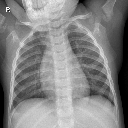

{'NORMAL': 0, 'PNEUMONIA': 1}


In [4]:
BATCH_SIZE = 250
TARGET_SIZE = [128, 128]

path = COLAB_PATH_MINI
image_generator = ImageDataGenerator().flow_from_directory(path, batch_size=BATCH_SIZE, target_size=TARGET_SIZE);
images, labels = next(image_generator)
images_scaled = images / 255

display(array_to_img(images[0]))
print(image_generator.class_indices)

In [5]:
images_scaled.shape

(186, 128, 128, 3)

In [6]:
x = images_scaled.reshape(images_scaled.shape[0],images_scaled.shape[1]*images_scaled.shape[2]*images_scaled.shape[3])

SHAPE = (x.shape[1],)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape = SHAPE))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3145792   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 3,145,922
Trainable params: 3,145,922
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x=x, y=labels, epochs=50)

Epoch 1/50
6/6 [==============================] - 13s 6ms/step - loss: 2.7939 - accuracy: 0.4825
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 0.6689 - accuracy: 0.5488
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.5783
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 0.6327 - accuracy: 0.6456
Epoch 5/50
6/6 [==============================] - 0s 5ms/step - loss: 0.5926 - accuracy: 0.6994
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 0.5647 - accuracy: 0.7324
Epoch 7/50
6/6 [==============================] - 0s 5ms/step - loss: 0.6353 - accuracy: 0.6778
Epoch 8/50
6/6 [==============================] - 0s 5ms/step - loss: 0.6738 - accuracy: 0.4641
Epoch 9/50
6/6 [==============================] - 0s 5ms/step - loss: 0.6578 - accuracy: 0.6895
Epoch 10/50
6/6 [==============================] - 0s 5ms/step - loss: 0.6448 - accuracy: 0.6754
Epoch 11/50
6/6 [=====================

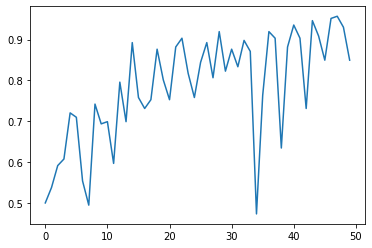

In [8]:
acc = history.history['accuracy']
plt.plot(range(len(acc)), acc);

### Full train dataset, no separate validation dataset used

In [ ]:
BATCH_SIZE_TRAIN = 1341+3875
TARGET_SIZE = [512, 512]

path = COLAB_PATH_TRAIN

t0 = time.time()
print(t0)
generator_train = ImageDataGenerator().flow_from_directory(path,
                                                          batch_size=BATCH_SIZE_TRAIN,
                                                          target_size=TARGET_SIZE)

images_train, labels_train = next(generator_train)
images_train_scaled = images_train / 256
t1 = time.time()
print('Runtime:', t1-t0)

print(images_train_scaled.shape, labels_train.shape)

1624567749.5155773
Found 5232 images belonging to 2 classes.


In [ ]:
def reshape_flat(x):
    s = x.shape
    dim_0 = s[0]
    dim_1 = s[1]*s[2]*s[3]
    x_flat = x.reshape(dim_0, dim_1)
    shape = (x_flat.shape[1],)
    return x_flat, shape

In [8]:
x, shape = reshape_flat(images_train_scaled)

model = Sequential()
model.add(Dense(TARGET_SIZE[0], activation='relu', input_shape = shape))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 196       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 206
Trainable params: 206
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x=x, y=labels_train, epochs=50, validation_split=0.25, verbose=2)

Epoch 1/100
98/98 [==============================] - 7s 73ms/step - loss: 0.6429 - accuracy: 0.7517 - mse: 0.1856 - val_loss: 0.4351 - val_accuracy: 0.7465 - val_mse: 0.1494
Epoch 2/100
98/98 [==============================] - 6s 59ms/step - loss: 0.4153 - accuracy: 0.8127 - mse: 0.1311 - val_loss: 0.3478 - val_accuracy: 0.8246 - val_mse: 0.1154
Epoch 3/100
98/98 [==============================] - 6s 57ms/step - loss: 0.3222 - accuracy: 0.8680 - mse: 0.0998 - val_loss: 0.4101 - val_accuracy: 0.8170 - val_mse: 0.1292
Epoch 4/100
98/98 [==============================] - 6s 59ms/step - loss: 0.2980 - accuracy: 0.8757 - mse: 0.0915 - val_loss: 0.2041 - val_accuracy: 0.9224 - val_mse: 0.0606
Epoch 5/100
98/98 [==============================] - 6s 61ms/step - loss: 0.2206 - accuracy: 0.9105 - mse: 0.0661 - val_loss: 0.1696 - val_accuracy: 0.9377 - val_mse: 0.0497
Epoch 6/100
98/98 [==============================] - 6s 59ms/step - loss: 0.2270 - accuracy: 0.9112 - mse: 0.0673 - val_loss: 0.18

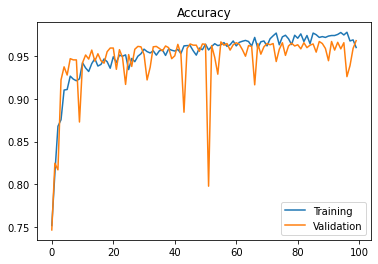

In [ ]:
history.history.keys()

acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epoch_ct = range(len(acc_train))

plt.plot(epoch_ct, acc_train, label='Training')
plt.plot(epoch_ct, acc_val, label='Validation')
plt.title('Accuracy')
plt.legend();

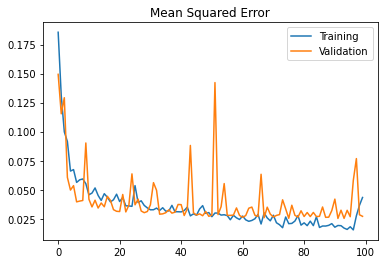

In [ ]:
history.history.keys()

mse_train = history.history['mse']
mse_val = history.history['val_mse']
epoch_ct = range(len(mse_train))

plt.plot(epoch_ct, mse_train, label='Training')
plt.plot(epoch_ct, mse_val, label='Validation')
plt.title('Mean Squared Error')
plt.legend();

### Incorporate resampling

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(images_train_scaled, labels_train, random_state=RANDOM_STATE, test_size = 0.25)

In [ ]:
# Oversample the minority class: 
# https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#oversample_the_minority_class
np.random.seed(RANDOM_STATE)


print(generator_train.class_indices)
ind_neg = y_train[:, 0]==1
ind_pos = y_train[:, 0]==0

neg_ct = ind_neg.sum()
pos_ct = ind_pos.sum()
print('NORMAL count:', neg_ct, ', PNEUMONIA count:', pos_ct)

ids = np.arange(neg_ct)

# Select random entries from the list of inputs
ind_add_ons = np.random.choice(ids, size=pos_ct-neg_ct)
add_ons_x = x_train[ind_neg][ind_add_ons]
add_ons_y = y_train[ind_neg][ind_add_ons]

x_train_balanced = np.concatenate([x_train, add_ons_x], axis=0)
y_train_balanced = np.concatenate([y_train, add_ons_y], axis=0)
print('Training sizes after resampling:', x_train_balanced.shape, y_train_balanced.shape)
print('NORMAL count, PNEUMONIA count:', y_train_balanced.sum(axis=0))

In [9]:
x_train_flat, shape = reshape_flat(x_train_balanced)
x_val_flat, _ = reshape_flat(x_val)

model = Sequential()
model.add(Dense(TARGET_SIZE[0], activation='relu', input_shape = shape))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy', 'mse'])

NameError: ignored

In [ ]:
history = model.fit(x=x_train_flat, y=y_train_balanced, epochs=50, validation_data=(x_val_flat, y_val))
model.summary()

### Incorporate Early Stopping

In [ ]:
early_stopping = [EarlyStopping(monitor='val_loss', patience=10),
                 ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(x=x_train_flat, y=y_train_balanced, 
                    callbacks=early_stopping,
                    epochs=250, 
                    validation_data=(x_val_flat, y_val))
best_model = keras.models.load_model('best_model.h5')
best_model.summary()

Epoch 1/250
182/182 [==============================] - 8s 47ms/step - loss: 0.0574 - accuracy: 0.9805 - mse: 0.0152 - val_loss: 0.3845 - val_accuracy: 0.8942 - val_mse: 0.0842
Epoch 2/250
182/182 [==============================] - 9s 47ms/step - loss: 0.1367 - accuracy: 0.9292 - mse: 0.0395 - val_loss: 0.3103 - val_accuracy: 0.9095 - val_mse: 0.1032
Epoch 3/250
182/182 [==============================] - 8s 43ms/step - loss: 0.2645 - accuracy: 0.9521 - mse: 0.0820 - val_loss: 0.1537 - val_accuracy: 0.9433 - val_mse: 0.0424
Epoch 4/250
182/182 [==============================] - 8s 42ms/step - loss: 0.1697 - accuracy: 0.9399 - mse: 0.0471 - val_loss: 0.1623 - val_accuracy: 0.9417 - val_mse: 0.0463
Epoch 5/250
182/182 [==============================] - 8s 42ms/step - loss: 0.1233 - accuracy: 0.9542 - mse: 0.0348 - val_loss: 0.1748 - val_accuracy: 0.9440 - val_mse: 0.0460
Epoch 6/250
182/182 [==============================] - 8s 42ms/step - loss: 0.1122 - accuracy: 0.9602 - mse: 0.0306 - va

### Add Regularization

In [ ]:
LAMBDA = 0.005

model = Sequential()
model.add(Dense(256, activation='relu', input_shape = shape, kernel_regularizer=regularizers.l2(LAMBDA)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(LAMBDA)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(LAMBDA)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='SGD', metrics=['accuracy', 'mse'], loss='categorical_crossentropy')
model.fit(x=x_train_flat, y=y_train_balanced, callbacks=early_stopping, epochs=250, validation_data=(x_val_flat, y_val))
best_model = keras.models.load_model('best_model.h5')
best_model.summary()

### Add Dropout

In [19]:
x_train_flat, shape = reshape_flat(x_train_balanced)
x_val_flat, _ = reshape_flat(x_val)
early_stopping = [EarlyStopping(monitor='val_loss', patience=10),
                 ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)]


import time

t0 = time.time()
print(t0)

LAMBDA = 0.005
DROPOUT = 0.3

model = Sequential()
model.add(Dense(256, activation='relu', input_shape = SHAPE, kernel_regularizer=regularizers.l2(LAMBDA)))
model.add(Dropout(DROPOUT))

model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(LAMBDA)))
model.add(Dropout(DROPOUT))

model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(LAMBDA)))
model.add(Dropout(DROPOUT))

model.add(Dense(2, activation='softmax'))
model.compile(optimizer='SGD', metrics=['accuracy', 'mse'], loss='categorical_crossentropy')
model.fit(x=x_train_flat, y=y_train_balanced, callbacks=early_stopping, epochs=250, validation_data=(x_val_flat, y_val), verbose=2)
best_model = keras.models.load_model('best_model.h5')
best_model.summary()
t1 = time.time()
print(t1)
print('Full runtime:', t1-t0)

1624504302.4227312
Epoch 1/250
182/182 [==============================] - 3s 12ms/step - loss: 3.8938 - accuracy: 0.5150 - mse: 0.2635 - val_loss: 3.7467 - val_accuracy: 0.9075 - val_mse: 0.2395
Epoch 2/250
182/182 [==============================] - 2s 9ms/step - loss: 3.6866 - accuracy: 0.6308 - mse: 0.2245 - val_loss: 3.5758 - val_accuracy: 0.6919 - val_mse: 0.2102
Epoch 3/250
182/182 [==============================] - 2s 9ms/step - loss: 3.4283 - accuracy: 0.7907 - mse: 0.1574 - val_loss: 3.2366 - val_accuracy: 0.8022 - val_mse: 0.1188
Epoch 4/250
182/182 [==============================] - 2s 9ms/step - loss: 3.2044 - accuracy: 0.8512 - mse: 0.1116 - val_loss: 2.9670 - val_accuracy: 0.9449 - val_mse: 0.0492
Epoch 5/250
182/182 [==============================] - 2s 9ms/step - loss: 3.1391 - accuracy: 0.8404 - mse: 0.1218 - val_loss: 2.8344 - val_accuracy: 0.9764 - val_mse: 0.0329
Epoch 6/250
182/182 [==============================] - 2s 8ms/step - loss: 2.9621 - accuracy: 0.8822 - ms